In [95]:
#уставливаем нужные библиотеки (команда пип не работает, но работает пип3, возможно из за macOS)
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
#!pip3 install openpyxl

In [115]:
# подключаем нужные библиотке и даем им ярлыки(alias) для простого обращения к ним
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Задание 1. Загрузка данных из файлов

In [68]:
df_completed = pd.read_csv('hw_lesson02_tutorial_completed.csv')
#df_sessions = pd.read_excel('hw_lesson02_sessions.xlsx', sheet_name='data')

# В общем я не разобрался как это открыть, спасибо всем в чате кто пытался помочь
# wb2 = load_workbook('hw_lesson02_sessions.xlsx')
# wb2

# далее все дз я буду работать только с одним файлом

In [79]:
print(df_completed.columns) # выводим все колонки в фрейме, без принта не выводит!
print("\n",'='*80,"\n")
df_completed.info() # получаем информацию о файле: в файле 4 колонки user_id, event_name, event_dt, duration_sec. Вес файла 1.8+ MB

Index(['user_id', 'event_name', 'event_dt', 'duration_sec'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [40]:
df_completed.head(5) #выводим первые 5 строчек фрейма

,user_id,event_name,event_dt,duration_sec
0,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,951
1,--014ca35_b7,tutorial_completed,2020-05-09 04:20:13,1143
2,--0424774bcb,tutorial_completed,2020-05-30 07:23:05,3758
3,--043682a1ad,tutorial_completed,2020-05-15 03:14:40,1326
4,--05-26b0-6b,tutorial_completed,2020-05-20 13:07:08,2828


In [93]:
#Изучите категориальные переменные (например, время обучения). Какие значения могут принимать категориальные переменные?
df_completed['duration_sec'].value_counts() # здесь мы считаем уникальные значения времени за которое пользователь прошел обучение
# Аналогично было бы и с другими столбцами

duration_sec
1512    34
1593    30
1459    30
1992    29
2151    29
        ..
7620     1
9921     1
5679     1
72       1
6197     1
Name: count, Length: 7276, dtype: int64

In [92]:

# Рассчитайте минимальные и максимальные даты в обоих фреймах. Какой временной интервал покрывают полученные данные?
print(df_completed['duration_sec'].max())
print(df_completed['duration_sec'].min())

df_completed['duration_sec'].describe()
# получем максимальное и минимальное время прохождения обчучения 2-мя способами: непосредственные командами и встроенными статистическими
# инструментами: из результата мы видим что максимальное время прохождения и минимальное время прохождения
# обучения= (71750, 30) секунд соответственно. Среднне время 2696 секунд. Мощность выборки - 59857.

71750
30


count    59857.000000
mean      2696.541357
std       1631.826723
min         30.000000
25%       1543.000000
50%       2398.000000
75%       3518.000000
max      71750.000000
Name: duration_sec, dtype: float64

# Задание 2. Описательная статистика
##### Исследуйте колонки duration_sec (а для session_duration у меня нет нужного фрейма)

In [109]:
# Рассчитайте для каждой из колонок среднее, среднеквадратическое отклонение, медиану;
# Непосредственный способ
print("среднее [сек]: ", df_completed['duration_sec'].mean())
print("стандартное отклонение [сек]: ", df_completed['duration_sec'].std())
print("медиана [сек]: ", df_completed['duration_sec'].median())

среднее [сек]:  2696.541356900613
стандартное отклонение [сек]:  1631.82672329392
медиана [сек]:  2398.0


In [108]:
# Рассчитайте для каждой из колонок среднее и медиану в минутах;
print("среднее [мин]: ", (df_completed['duration_sec']/60).mean())
print("стандартное отклонение [мин]: ", (df_completed['duration_sec']/60).std())
print("медиана [мин]: ", (df_completed['duration_sec']/60).median())

среднее [мин]:  44.942355948343554
стандартное отклонение [мин]:  27.197112054898664
медиана [мин]:  39.96666666666667


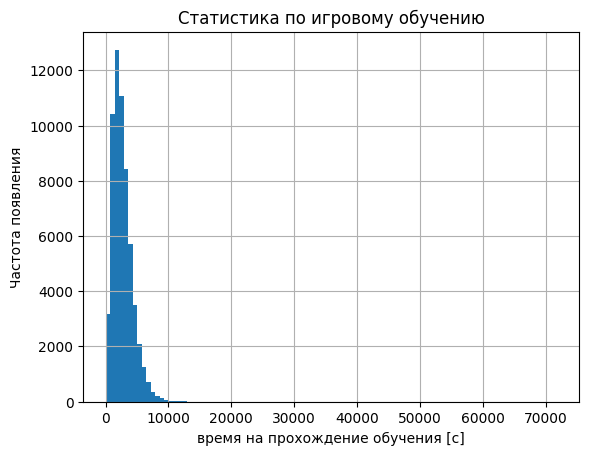

In [123]:
# Постройте гистограммы для колонок duration_sec. Опишите, какие распределения вы видите на гистограммах;
# Опишите ваши выводы и наблюдения.
plt.hist(df_completed['duration_sec'], bins = 100)
plt.xlabel('время на прохождение обучения [c]')
plt.ylabel('Частота появления')
plt.title('Статистика по игровому обучению')
plt.grid(True) # можно было не писать, оно по default так
plt.show()
# распределение похоже на нормальное, но все же я бы его таким не назвал 
# и использовал бы далее методы предназначенные не для нормальных распределений

# Задание 3. Исследование выбросов

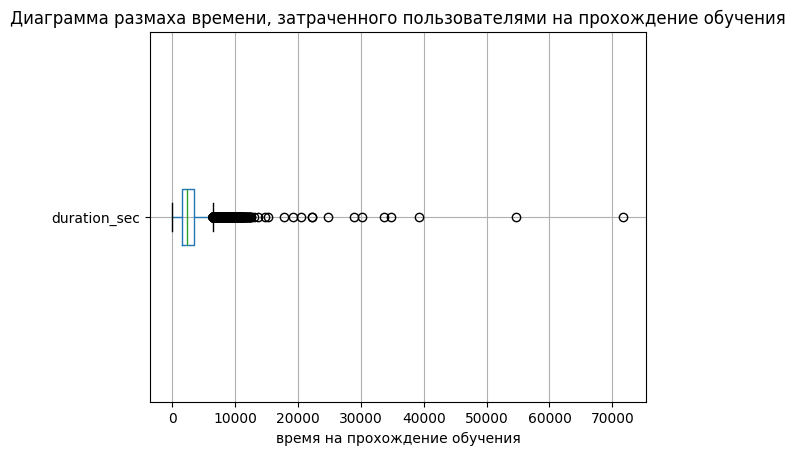

99 перцентиль:  7605.440000000002


In [146]:
# Исследуйте колонки duration_sec на наличие выбросов:
df_completed.boxplot("duration_sec", vert = False) # строим ящик с усами
plt.xlabel('время на прохождение обучения')
plt.title('Диаграмма размаха времени, затраченного пользователями на прохождение обучения')
plt.show()
percentil_99 = df_completed["duration_sec"].quantile(0.99) # считаем 0.99 перцентиль
print("99 перцентиль: ", percentil_99)
# выводы: очень много выбросов, скорее всего, пользователям что то мешает и они затягивают/ не проходят вступление
# те же, кто проходят обучение, укладываются за 7605 секунд с веротяностью 0.99

# Задание 4. Сохранение данных в файл

In [153]:
#С помощью query отфильтруйте из таблиц визитов и учебных игр выбросы по столбцам duration_sec
out_of_data = df_completed.query('duration_sec > 7605') # фильтруем выбросы - всех тех кто не вошел в 0.99 доверительный интервал
#df_completed["duration_sec"]
#out_of_data
out_of_data_sort = sorted(out_of_data['duration_sec']) # сортируем их по возрастанию

In [150]:
# Сохраните получившиеся дата-фреймы в csv-файлы
out_of_data.to_csv("task4_out_of_data.csv", index=False) # сохраняем выбросы в csv файл

# Задание 5. Фильтрация выбросов с помощью функции
##### Напишите функцию filter_outliers, которая принимает на вход:
##### Датафрейм;
##### Наименование столбца, по которому в этом датафрейме нужно найти выбросы;
##### Значения границы выбросов для расчета перцентиля.
##### Функция должна убирать из фрейма все выбросы по указанному столбцу и возвращать отфильтрованный датафрейм

In [166]:
# функция не предназначена для исключений, подразумевается что датафрейм и столбец существуют quantile < 1
def sep():
    print(f"\n{'='*75}\n")


def filter_outliers(data_frame, data_string: str, quantile_num: float):
    percentil = data_frame[data_string].quantile(quantile_num)
    return data_frame[(data_frame[data_string] > percentil)]


#примеры выходных данных
print(filter_outliers(df_completed,"duration_sec",0.99))
sep()
print(filter_outliers(df_completed,"duration_sec",0.75))
sep()
print(filter_outliers(df_completed,"duration_sec",0.5))
sep()
print(filter_outliers(df_completed,"duration_sec",0.25))

            user_id          event_name             event_dt  duration_sec
173    -14c3534f937  tutorial_completed  2020-04-15 09:27:04          8581
244    -2367420c42a  tutorial_completed  2020-05-15 21:31:46          8618
426    -4b5f83c89-c  tutorial_completed  2020-05-12 12:31:49          7817
516    -607465d8-37  tutorial_completed  2020-05-26 07:06:31          8827
597    -74065c75f7a  tutorial_completed  2020-05-29 00:57:08         10554
...             ...                 ...                  ...           ...
59440  fc0_9f2d8cab  tutorial_completed  2020-06-05 05:03:56          9216
59610  fd2_-06f4974  tutorial_completed  2020-06-04 23:31:42          8007
59652  fd882c7710-a  tutorial_completed  2020-06-03 21:48:03          8578
59782  ff71-b-__76d  tutorial_completed  2020-06-18 21:43:14          7668
59836  ffc8779a761a  tutorial_completed  2020-04-18 11:25:22          8370

[599 rows x 4 columns]


            user_id          event_name             event_dt  duration_sec